# NumPy Basics: Arrays and Vectorized Computation

In [1]:
%matplotlib inline

In [5]:
from __future__ import division
from numpy.random import randn
import numpy as np
np.set_printoptions(precision=4, suppress=True)

## The NumPy ndarray: a multidimensional array object

In [6]:
data = randn(2, 3)

In [9]:
data
data * 10
data + data


array([[-0.3239, -2.9635,  3.4809],
       [ 3.2716,  1.9433,  0.9218]])

### ndarray
多维数组，所有的元素必须是相同的类型，包含两个属性，一个是shape表示维度大小的元组，一个是dtype表示数据类型

In [10]:
data.shape
data.dtype

dtype('float64')

### Creating ndarrays
+ 使用np.array()函数将其他序列型对象如列表等转换为ndarray，将嵌套序列转为多维数组

In [13]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([ 6. ,  7.5,  8. ,  0. ,  1. ])

In [14]:
#将列表嵌套列表的对象作为2位数组
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2
arr2.ndim
arr2.shape

(2, 4)

In [15]:
arr1.dtype
arr2.dtype

dtype('int32')

In [20]:
#通过其他函数快速初始化一个数组，类似matlab中的zeros和ones,其中参数为一个元组
np.zeros(10)
np.zeros((3, 6))
np.empty((2, 3, 2))
np.ones((3,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [22]:
np.arange(15)
#内置函数range的数组版

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### Data Types for ndarrays

In [23]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr1.dtype
arr2.dtype

dtype('int32')

In [24]:
arr = np.array([1, 2, 3, 4, 5])
print(arr.dtype)
#可以通过astype显式转换类型
float_arr = arr.astype(np.float64)
float_arr.dtype

int32


dtype('float64')

In [26]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr
#浮点转为int时，小数部分会被丢掉
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

In [29]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([  1.25,  -9.6 ,  42.  ])

In [30]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [31]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=uint32)

### Operations between arrays and scalars
### 数组和标量间的运算
在Matlab中通过使用.来表示矩阵间为标量运算，但在numpy中直接使用运算符即为标量运算

In [34]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr
arr * arr
arr - arr

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [35]:
1 / arr
arr ** 0.5

array([[ 1.    ,  1.4142,  1.7321],
       [ 2.    ,  2.2361,  2.4495]])

### Basic indexing and slicing
### 基本的索引和切片

In [36]:
arr = np.arange(10)
arr
arr[5]
arr[5:8]
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

**非常关键的是，在Numpy中数组的切片是原始数组的映射而非copy生成了一个新的数组，若想copy则需要使用.copy()函数显示操作**

In [37]:
arr_slice = arr[5:8]
arr_slice[1] = 12345
print(arr)
arr_slice[:] = 64
arr

[    0     1     2     3     4    12 12345    12     8     9]


array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [38]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [41]:
#两种索引方式是等价的
print(arr2d[0][2])
print(arr2d[0, 2])

3
3


In [42]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [44]:
#在高维数组中，仅填入一个索引会得到一个低维的数组，包含指定的高维所有数据的数组
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [45]:
old_values = arr3d[0].copy()
arr3d[0] = 42
print(arr3d)
arr3d[0] = old_values
arr3d

[[[42 42 42]
  [42 42 42]]

 [[ 7  8  9]
  [10 11 12]]]


array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [ ]:
arr3d[1, 0]

#### Indexing with slices
#### 切片索引
使用方法基本等同于Matlab中的语法

In [46]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [47]:
arr2d
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [48]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [49]:
arr2d[1, :2]
arr2d[2, :1]

array([7])

In [50]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [51]:
arr2d[:2, 1:] = 0

### Boolean indexing
### 布尔型索引
即matlab中通过判断条件得到布尔型索引，根据条件筛选数组中的元素

In [55]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = randn(7, 4)
print(names)
data

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']


array([[-0.341 , -0.2886, -1.6557, -0.2676],
       [-0.0765, -1.7571,  0.8964,  0.35  ],
       [ 0.0173,  0.2907,  2.0383,  1.3647],
       [ 1.4421,  0.0129, -0.4894,  0.5196],
       [-0.2357, -0.1832, -1.1109,  0.0531],
       [-0.1164,  0.3834,  0.3094, -2.1357],
       [ 0.3777,  0.0393,  1.3032, -0.1381]])

In [56]:
names == 'Bob'

array([ True, False, False,  True, False, False, False], dtype=bool)

In [57]:
data[names == 'Bob']

array([[-0.341 , -0.2886, -1.6557, -0.2676],
       [ 1.4421,  0.0129, -0.4894,  0.5196]])

In [59]:
print(data[names == 'Bob', 2:])
data[names == 'Bob', 3]

[[-1.6557 -0.2676]
 [-0.4894  0.5196]]


array([-0.2676,  0.5196])

In [62]:
names != 'Bob'
#使用~表示非
data[~(names == 'Bob')]

array([[-0.0765, -1.7571,  0.8964,  0.35  ],
       [ 0.0173,  0.2907,  2.0383,  1.3647],
       [-0.2357, -0.1832, -1.1109,  0.0531],
       [-0.1164,  0.3834,  0.3094, -2.1357],
       [ 0.3777,  0.0393,  1.3032, -0.1381]])

In [63]:
mask = (names == 'Bob') | (names == 'Will')
mask
data[mask]

array([[-0.341 , -0.2886, -1.6557, -0.2676],
       [ 0.0173,  0.2907,  2.0383,  1.3647],
       [ 1.4421,  0.0129, -0.4894,  0.5196],
       [-0.2357, -0.1832, -1.1109,  0.0531]])

In [64]:
data[data < 0] = 0
data

array([[ 0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.8964,  0.35  ],
       [ 0.0173,  0.2907,  2.0383,  1.3647],
       [ 1.4421,  0.0129,  0.    ,  0.5196],
       [ 0.    ,  0.    ,  0.    ,  0.0531],
       [ 0.    ,  0.3834,  0.3094,  0.    ],
       [ 0.3777,  0.0393,  1.3032,  0.    ]])

In [65]:
data[names != 'Joe'] = 7
data

array([[ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 0.    ,  0.    ,  0.8964,  0.35  ],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 0.    ,  0.3834,  0.3094,  0.    ],
       [ 0.3777,  0.0393,  1.3032,  0.    ]])

### Fancy indexing
### 神奇索引
通过传入一个整数数组来进行索引，按照索引的顺序取出对应的元素


In [68]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

In [69]:
arr[[4, 3, 0, 6]]

array([[ 4.,  4.,  4.,  4.],
       [ 3.,  3.,  3.,  3.],
       [ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.]])

In [71]:
#负数表示从后往前索引
arr[[-3, -5, -7]]

array([[ 5.,  5.,  5.,  5.],
       [ 3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.]])

In [73]:
# more on reshape in Chapter 12
arr = np.arange(32).reshape((8, 4))
print(arr)
#根据两个整数数组一一对应直接选元素，数组长度必须一致为n，结果长度也为n
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


array([ 4, 23, 29, 10])

In [78]:
#首先根据第一个数组选出对应的行，根据第二个数组在每个选出的行选出对应的元素,数组长度不必一致，索引数组长度n,m结果长度n*m
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2,1]]

array([[ 4,  7,  5,  6,  5],
       [20, 23, 21, 22, 21],
       [28, 31, 29, 30, 29],
       [ 8, 11,  9, 10,  9]])

In [79]:
arr[np.ix_([1, 5, 7, 2], [0, 3, 1, 2])]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### Transposing arrays and swapping axes
### 数组转至和轴对换

In [81]:
arr = np.arange(15).reshape((3, 5))
print(arr)
arr.T#二维数组，相当于matlab中的'

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [83]:
arr = np.random.randn(6, 3)
#np.dot（）矩阵乘法
np.dot(arr.T, arr)

array([[ 14.9328,   3.9867,  -6.7523],
       [  3.9867,  11.7634,  -0.4559],
       [ -6.7523,  -0.4559,   6.1035]])

In [86]:
arr = np.arange(16).reshape((2, 2, 4))
print(arr)
#三维数组，转换时需要输入一个元组，原轴对应的新轴，使用transpose()
arr.transpose((1, 0, 2))

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [88]:
arr
#仅更换两个轴时可以使用swapaxes()
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## Universal Functions: Fast element-wise array functions
## 通用函数：快速的元素级数组函数


In [91]:
arr = np.arange(10)
np.sqrt(arr)
np.exp(arr)

array([    1.    ,     2.7183,     7.3891,    20.0855,    54.5982,
         148.4132,   403.4288,  1096.6332,  2980.958 ,  8103.0839])

In [93]:
x = randn(8)
y = randn(8)
print(x)
print(y)
#传入两个等长数组返回两个数组中较大的数
np.maximum(x, y) # element-wise maximum

[-0.0356 -1.2529  1.6665 -0.0891  0.5659  0.0104 -1.3466  2.6621]
[ 0.5936  1.1949 -0.6257 -0.642   0.1775  0.805  -1.6746  1.6796]


array([ 0.5936,  1.1949,  1.6665, -0.0891,  0.5659,  0.805 , -1.3466,
        2.6621])

In [103]:
arr = randn(7) * 5
#modf将数组的小数部分和整数部分分别返回一个数组
np.modf(arr)

(array([ 0.3956,  0.4253,  0.497 ,  0.7513, -0.2538,  0.4728,  0.3646]),
 array([ 1.,  3.,  0.,  1., -2.,  1.,  1.]))

In [102]:
a = np.arange(24).reshape(4,2,3)
#即使是高维数组，也是直接返回了最大的元素而不是数组
a.max()
#无法接收高维数组作为参数
np.maximum(a)

ValueError: invalid number of arguments

## Data processing using arrays
## 利用数组做数据分析
用数组表达式代替循环的做法同常称为矢量化， 运算速度要比使用循环快上一两个数量级

In [107]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ..., 
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [108]:
from matplotlib.pyplot import imshow, title

[[ 7.0711  7.064   7.0569 ...,  7.0499  7.0569  7.064 ]
 [ 7.064   7.0569  7.0499 ...,  7.0428  7.0499  7.0569]
 [ 7.0569  7.0499  7.0428 ...,  7.0357  7.0428  7.0499]
 ..., 
 [ 7.0499  7.0428  7.0357 ...,  7.0286  7.0357  7.0428]
 [ 7.0569  7.0499  7.0428 ...,  7.0357  7.0428  7.0499]
 [ 7.064   7.0569  7.0499 ...,  7.0428  7.0499  7.0569]]


Text(0.5,1,'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

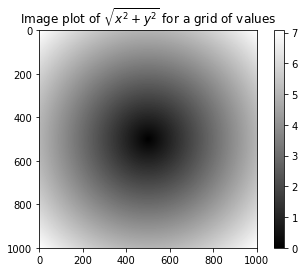

In [111]:
import matplotlib.pyplot as plt
z = np.sqrt(xs ** 2 + ys ** 2)
print(z)
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [110]:
plt.draw()

### Expressing conditional logic as array operations
### 将条件逻辑表述为数组操作

In [112]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [113]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1000000000000001, 2.2000000000000002, 1.3, 1.3999999999999999, 2.5]

In [115]:
#np.where=x if c else y
result = np.where(cond, xarr, yarr)
result

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

In [119]:
arr = randn(4, 4)
print(arr)
np.where(arr > 0, 2, -2)
np.where(arr > 0, 2, arr) # set only positive values to 2

[[-0.469   0.0562 -1.0168 -1.31  ]
 [ 0.116   1.0239  0.1575 -0.8773]
 [ 0.3634 -0.7146 -0.2147 -0.3368]
 [ 1.3734 -1.0687  0.3811 -1.6976]]


array([[-0.469 ,  2.    , -1.0168, -1.31  ],
       [ 2.    ,  2.    ,  2.    , -0.8773],
       [ 2.    , -0.7146, -0.2147, -0.3368],
       [ 2.    , -1.0687,  2.    , -1.6976]])

In [121]:
# Not to be executed
#表示逻辑的伪代码
result = []
for i in range(n):
    if cond1[i] and cond2[i]:
        result.append(0)
    elif cond1[i]:
        result.append(1)
    elif cond2[i]:
        result.append(2)
    else:
        result.append(3)

NameError: name 'n' is not defined

In [122]:
# Not to be executed

np.where(cond1 & cond2, 0,
         np.where(cond1, 1,
                  np.where(cond2, 2, 3)))

NameError: name 'cond1' is not defined

In [123]:
# Not to be executed

result = 1 * cond1 + 2 * cond2 + 3 * -(cond1 | cond2)

NameError: name 'cond1' is not defined

### Mathematical and statistical methods
### 数学和统计方法


In [130]:

arr = np.random.randn(5, 4) # normally-distributed data
arr.mean()
np.mean(arr)
arr.sum()

4.4586703165998092

In [131]:
#mean和Sum这类聚合计算可以接受传入一个轴参数，返回一个少一维的数组
arr.mean(axis=1)
arr.sum(0)

array([ 2.0846,  2.3882, -0.3501,  0.336 ])

In [128]:
np.maximum?

In [132]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
#所有元素的累积和
arr.cumsum(0)
#所有元素的累积积
arr.cumprod(1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

### Methods for boolean arrays
### 适用于布尔数组的方法

In [133]:
arr = randn(100)
(arr > 0).sum() # Number of positive values

48

In [135]:
bools = np.array([False, False, True, False])
#any()是否有多个True
bools.any()
#all()是否都为True
bools.all()

False

### Sorting
### 排序
与python的list类型一致，也可以使用sort方法

In [136]:
arr = randn(8)
arr
arr.sort()
arr

array([-1.5519, -0.606 , -0.3778, -0.2871,  0.4751,  0.8944,  1.736 ,
        1.9151])

In [138]:
arr = randn(5, 3)
arr
#多维数组沿某个轴排序
arr.sort(1)
arr

array([[ 0.3142,  0.6138,  0.8903],
       [-1.2092,  1.323 ,  2.0135],
       [-1.6524, -1.2893,  0.3995],
       [-1.8473,  0.1679,  0.6639],
       [-2.9375, -1.1623,  0.6093]])

In [140]:
large_arr = randn(1000)
large_arr.sort()
#quantile
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.738973156690137

### Unique and other set logic
### 唯一化以及其他的集合逻辑

In [141]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
#找出数组中唯一值并返回已排序的结果
np.unique(names)
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [142]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [143]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
#in1d，数组1的值在数组二中是否存在
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True], dtype=bool)

## File input and output with arrays
## 用于数组的文件输入输出

### Storing arrays on disk in binary format
### 以二进制在磁盘上存储数组

In [146]:
arr = np.arange(10)
#数组以未压缩的形式存储为2进制文件
np.save('some_array', arr)

In [147]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [148]:
#标为.npz表示压缩，可同时存储多个数组，读取时会得到一个类似字典的对象
np.savez('array_archive.npz', a=arr, b=arr)

In [149]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [151]:
#windows系统无效，linux下应该可以
!rm some_array.npy
!rm array_archive.npz

'rm' 不是内部或外部命令，也不是可运行的程序
或批处理文件。
'rm' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


### Saving and loading text files
### 存储和读取文本文件

In [155]:
#!cat array_ex.txt
#windows下使用Type
!type array_ex.txt

系统找不到指定的文件。


In [158]:
#此处需要根据实际情况修改路径
#np.savetxt执行的是相反的操作
arr = np.loadtxt('./ch04/array_ex.txt', delimiter=',')
arr

array([[ 0.5801,  0.1867,  1.0407,  1.1344],
       [ 0.1942, -0.6369, -0.9387,  0.1241],
       [-0.1264,  0.2686, -0.6957,  0.0474],
       [-1.4844,  0.0042, -0.7442,  0.0055],
       [ 2.3029,  0.2001,  1.6702, -1.8811],
       [-0.1932,  1.0472,  0.4828,  0.9603]])

## Linear algebra
## 线性代数

In [161]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x
y
#矩阵乘法（点积）
x.dot(y)  # equivalently np.dot(x, y)

array([[  28.,   64.],
       [  67.,  181.]])

In [162]:
np.dot(x, np.ones(3))

array([  6.,  15.])

In [167]:
#使用相同的Seed值则每次生成的随机数都相同
np.random.seed(12345)
np.random.seed?

In [165]:
#求矩阵的逆等运算
from numpy.linalg import inv, qr
X = randn(5, 5)
#X'X
mat = X.T.dot(X)
inv(mat)
mat.dot(inv(mat))
q, r = qr(mat)
r

array([[ -6.9271,   7.389 ,   6.1227,  -7.1163,  -4.9215],
       [  0.    ,  -3.9735,  -0.8671,   2.9747,  -5.7402],
       [  0.    ,   0.    , -10.2681,   1.8909,   1.6079],
       [  0.    ,   0.    ,   0.    ,  -1.2996,   3.3577],
       [  0.    ,   0.    ,   0.    ,   0.    ,   0.5571]])

## Random number generation
## 随机数生成

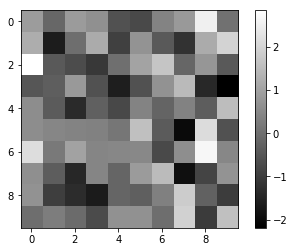

In [172]:
#使用normal生成正态分布的随机数
samples = np.random.normal(size=(10, 10))
samples
plt.imshow(samples, cmap=plt.cm.gray); plt.colorbar()

In [176]:
from random import normalvariate
N = 1000000

%timeit samples = [normalvariate(0, 1) for _ in range(N)]
#不使用循环使得计算快了很多
%timeit np.random.normal(size=N)

761 ms ± 20.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
32.7 ms ± 2.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Example: Random Walks
## 随机漫步

In [177]:
import random
position = 0
walk = [position]
steps = 1000
for i in xrange(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

NameError: name 'xrange' is not defined

In [178]:
np.random.seed(12345)

In [179]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [180]:
walk.min()
walk.max()

31

In [181]:
(np.abs(walk) >= 10).argmax()

37

### Simulating many random walks at once
### 一次模拟多个随机漫步

In [182]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ..., 
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]], dtype=int32)

In [183]:
walks.max()
walks.min()

-133

In [184]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30
hits30.sum() # Number that hit 30 or -30

3410

In [185]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

498.88973607038122

In [186]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))